<a href="https://colab.research.google.com/github/siddharthlanke/oasis_task_2/blob/main/unemployment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt

Importing the dataset

In [11]:
df = pd.read_csv(r'/content/Unemployment_Rate_upto_11_2020.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


Checking for null values

In [12]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

Renaming the cloumns

In [13]:
df.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']

In [14]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['Frequency']= df['Frequency'].astype('category')
df['Month'] =  df['Date'].dt.month
df['Month_int'] = df['Month'].apply(lambda x : int(x))
df['Month_name'] =  df['Month_int'].apply(lambda x: calendar.month_abbr[x])
df.drop(columns='Month',inplace=True)
df['Region'] = df['Region'].astype('category')
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


Region-wise Statistics

Heatmap

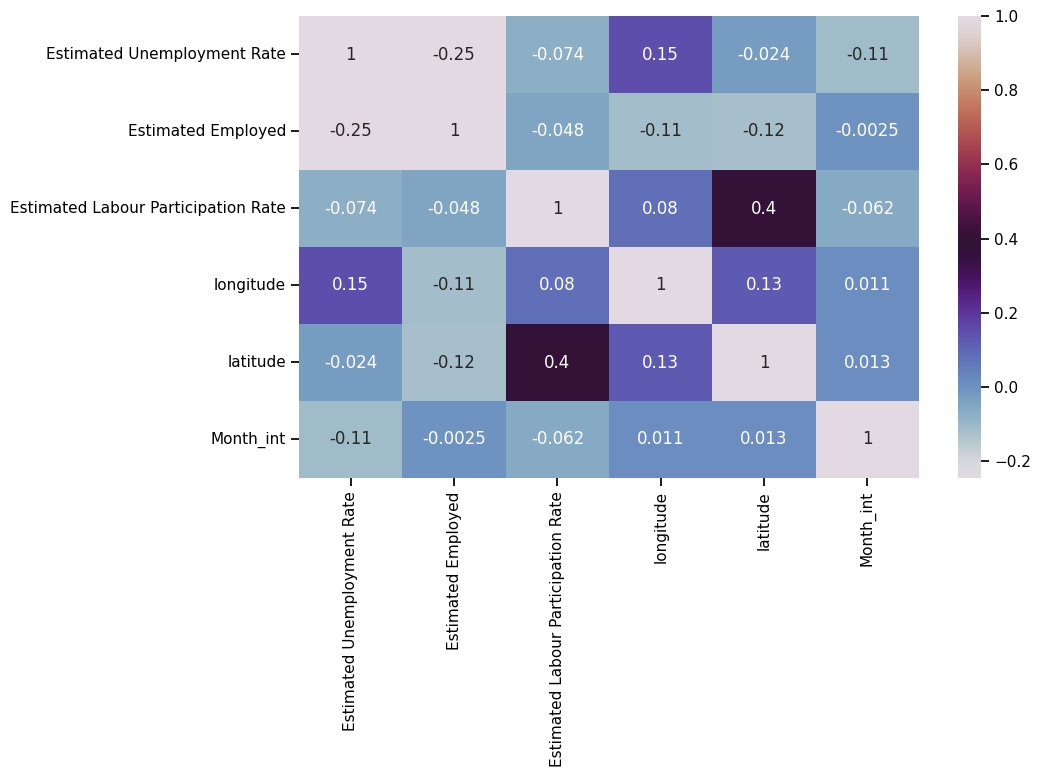

In [15]:
heat_maps = df[['Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate',
       'longitude', 'latitude', 'Month_int']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='twilight');

In [16]:
import plotly.express as px
fig = px.box(df,x='States',y='Estimated Unemployment Rate',color='States',title='Unemployment rate (State Wise):',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [17]:
plot_ump = df[['Estimated Unemployment Rate','States']]
df_unemp = plot_ump.groupby('States').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')
fig = px.bar(df_unemp, x='States',y='Estimated Unemployment Rate',color='States',
            title='Average Unemployment Rate in each state:',template='plotly')
fig.show()

In [18]:
fig = px.bar(df, x='Region',y='Estimated Unemployment Rate',animation_frame = 'Month_name',color='States',
            title='Unemployment rate across region from Jan.2020 to Oct.2020:', height=700,template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

In [19]:
unemplo_df = df[['States','Region','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]
unemplo = unemplo_df.groupby(['Region','States'])['Estimated Unemployment Rate'].mean().reset_index()
fig = px.sunburst(unemplo, path=['Region','States'], values='Estimated Unemployment Rate',
                  color_continuous_scale='Plasma',title= 'Unemployment rate in each region and state:',
                  height=650,template='ggplot2')
fig.show()

In [20]:
lock = df[(df['Month_int'] >= 4) & (df['Month_int'] <=7)]
bf_lock = df[(df['Month_int'] >= 1) & (df['Month_int'] <=4)]
g_lock = lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_bf_lock = bf_lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_lock['Unemployment Rate before lockdown'] = g_bf_lock['Estimated Unemployment Rate']
g_lock.columns = ['States','Unemployment Rate after lockdown','Unemployment Rate before lockdown']
g_lock.head()

,States,Unemployment Rate after lockdown,Unemployment Rate before lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250
2,Bihar,30.8025,20.7425
3,Chhattisgarh,9.6025,7.2450
4,Delhi,24.3600,17.6975


Percentage change in unemployment rate bfore and after lockdown:

In [21]:
import plotly.express as px
g_lock['percentage change in unemployment'] = round(g_lock['Unemployment Rate after lockdown'] - g_lock['Unemployment Rate before lockdown']/g_lock['Unemployment Rate before lockdown'],2)
plot_per = g_lock.sort_values('percentage change in unemployment')
fig = px.bar(plot_per, x='States',y='percentage change in unemployment',color='percentage change in unemployment',
            title='Percentage change in Unemployment in each state after lockdown',template='ggplot2', color_continuous_scale='greens')
fig.show()

# Most impacted states:
Puducherry, Jharkhand, Bihar, Haryana, Tripura